

**DATA PRE-PREPROCESSING**

    1. Text cleaning 
    
    2. Tokenization
    
    3. Removing ‘stop words’
    
    4. Stemming/lemmatization
    
**MODEL BUILDING**

#### DATA PRE-PROCESSING

In [5]:
import pandas as pd
import re
import string

# libraries for visualizations
import seaborn as sns
import matplotlib.pyplot as plt

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")

In [6]:
news = pd.read_csv('data/articles1.csv')
news.head()

,Unnamed: 0,id,title,publication,author,date,year,month,url,content
0,0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...
1,1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood..."
2,2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t..."
4,4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ..."


The data set (articles1.csv) is missing around 6306 entries for the author and all the urls. The rest of the columns are fine. 

In [8]:
# reset the index
news.reset_index(drop=True, inplace=True)

# drop the unnamed column
news.drop(columns='Unnamed: 0', inplace=True)
news.head()

,id,title,publication,author,date,year,month,url,content
0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...
1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood..."
2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t..."
4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ..."


In [9]:
# doing some EDA to understand the dataset for a bit

# 1. Articles by author count - 

# 1. Articles by New's company 

news['author'].unique()

array(['Carl Hulse', 'Benjamin Mueller and Al Baker', 'Margalit Fox', ...,
       'John Walsh ', 'Derek Thompson', 'Julia Ioffe'], dtype=object)

In [10]:
# subset the dataframe and get relevant columns
df = news.loc[0:100]
columns = ['id', 'title', 'content']
df = df[columns]
df.head()

,id,title,content
0,17283,House Republicans Fret About Winning Their Hea...,WASHINGTON — Congressional Republicans have...
1,17284,Rift Between Officers and Residents as Killing...,"After the bullet shells get counted, the blood..."
2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...","When Walt Disney’s “Bambi” opened in 1942, cri..."
3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...","Death may be the great equalizer, but it isn’t..."
4,17287,Kim Jong-un Says North Korea Is Preparing to T...,"SEOUL, South Korea — North Korea’s leader, ..."


#### Document Pre-Processing

In [11]:
# function 1
def clean_text(text):
    """
    takes a text, remove the words with digits, 
    replace newline characters with space, remove URLs, 
    and replace everything that isn’t English alphabets with space.
    """
    text=re.sub('\w*\d\w*','', text)
    text=re.sub('\n',' ',text)
    text=re.sub(r"http\S+", "", text)
    text=re.sub('[^a-z]',' ',text)
    return text




In [12]:
# apply the function
# news['content'] = news['content'].apply(lambda x: lowercase_function(x))

# alternatively
df['content_clean'] = df['content'].apply(lambda x: x.lower())
df.head()

,id,title,content,content_clean
0,17283,House Republicans Fret About Winning Their Hea...,WASHINGTON — Congressional Republicans have...,washington — congressional republicans have...
1,17284,Rift Between Officers and Residents as Killing...,"After the bullet shells get counted, the blood...","after the bullet shells get counted, the blood..."
2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...","When Walt Disney’s “Bambi” opened in 1942, cri...","when walt disney’s “bambi” opened in 1942, cri..."
3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...","Death may be the great equalizer, but it isn’t...","death may be the great equalizer, but it isn’t..."
4,17287,Kim Jong-un Says North Korea Is Preparing to T...,"SEOUL, South Korea — North Korea’s leader, ...","seoul, south korea — north korea’s leader, ..."


In [13]:
def calculate_len(post):
    return len(post)

news['length'] = news['content'].apply(lambda x: calculate_len(x))
news

,id,title,publication,author,date,year,month,url,content,length
0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...,5607
1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood...",27834
2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri...",14018
3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t...",12274
4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ...",4195
...,...,...,...,...,...,...,...,...,...,...
49995,73465,"Rex Tillerson Says Climate Change Is Real, but …",Atlantic,Robinson Meyer,2017-01-11,2017.0,1.0,NaN,"As chairman and CEO of ExxonMobil, Rex Tillers...",5784
49996,73466,The Biggest Intelligence Questions Raised by t...,Atlantic,Amy Zegart,2017-01-11,2017.0,1.0,NaN,I’ve spent nearly 20 years looking at intellig...,6116
49997,73467,Trump Announces Plan That Does Little to Resol...,Atlantic,Jeremy Venook,2017-01-11,2017.0,1.0,NaN,Donald Trump will not be taking necessary st...,59561
49998,73468,Dozens of For-Profit Colleges Could Soon Close,Atlantic,Emily DeRuy,2017-01-11,2017.0,1.0,NaN,Dozens of colleges could be forced to close ...,7177


In [17]:
# remove punctuation
def remove_noise(txt):
    txt = re.sub("(@[A-Za-z0–9_]+)", "", txt)
    txt = "".join([char if char not in string.punctuation else " " for char in txt])
    txt = re.sub(" +", " ", txt)
    txt = re.sub("[0–9]+", "", txt)
    txt = re.sub("[^A-Za-z0–9_. ]+", "", txt)

    return txt

df['clean_content'] = df['content'].apply(lambda x: remove_noise(x))
df.head()
# remove special characters

# tokenize the text (split at the space)

# 


,id,title,content,content_clean,clean_content
0,17283,House Republicans Fret About Winning Their Hea...,WASHINGTON — Congressional Republicans have...,washington — congressional republicans have...,WASHINGTON Congressional Republicans have a n...
1,17284,Rift Between Officers and Residents as Killing...,"After the bullet shells get counted, the blood...","after the bullet shells get counted, the blood...",After the bullet shells get counted the blood ...
2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...","When Walt Disney’s “Bambi” opened in 1942, cri...","when walt disney’s “bambi” opened in 1942, cri...",When Walt Disneys Bambi opened in critics pra...
3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...","Death may be the great equalizer, but it isn’t...","death may be the great equalizer, but it isn’t...",Death may be the great equalizer but it isnt n...
4,17287,Kim Jong-un Says North Korea Is Preparing to T...,"SEOUL, South Korea — North Korea’s leader, ...","seoul, south korea — north korea’s leader, ...",SEOUL South Korea North Koreas leader Kim sai...


In [18]:
from nltk.tokenize import word_tokenize

In [19]:
def remove_stop_words(txt):
    tokens = word_tokenize(txt)
    text_with_no_stop_words = [
        token for token in tokens if not token in stop_words
    ]
    reformed_tweet = " ".join(text_with_no_stop_words)

    return reformed_tweet

def makeWordTokens(txt):
    return word_tokenize(txt)

### Dealing with Stopwords

In [20]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/brianzuki/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
stop_words = stopwords.words("english")

In [27]:
txt = df['clean_content'][0]
txt = remove_stop_words(txt)
txt = remove_noise(txt)
txt = txt.lower()
# txt = lowercase_function(txt)
word_tokens = word_tokenize(txt)

In [28]:
word_tokens = pd.DataFrame(word_tokens)

### Tokenization

In [29]:
from collections import Counter

tokens = Counter()
word_tokens.apply(tokens.update)

# Printing the count of the tokens
tokens_df = (
    pd.DataFrame.from_dict(tokens, orient="index")
    .reset_index()
    .rename(columns={"index": "token", 0: "count"})
)

tokens_df.sort_values(by="count", ascending=False)

,token,count
34,house,18
2,republicans,15
10,administration,12
6,health,11
16,trump,8
...,...,...
138,taking,1
139,office,1
140,evaluate,1
142,related,1


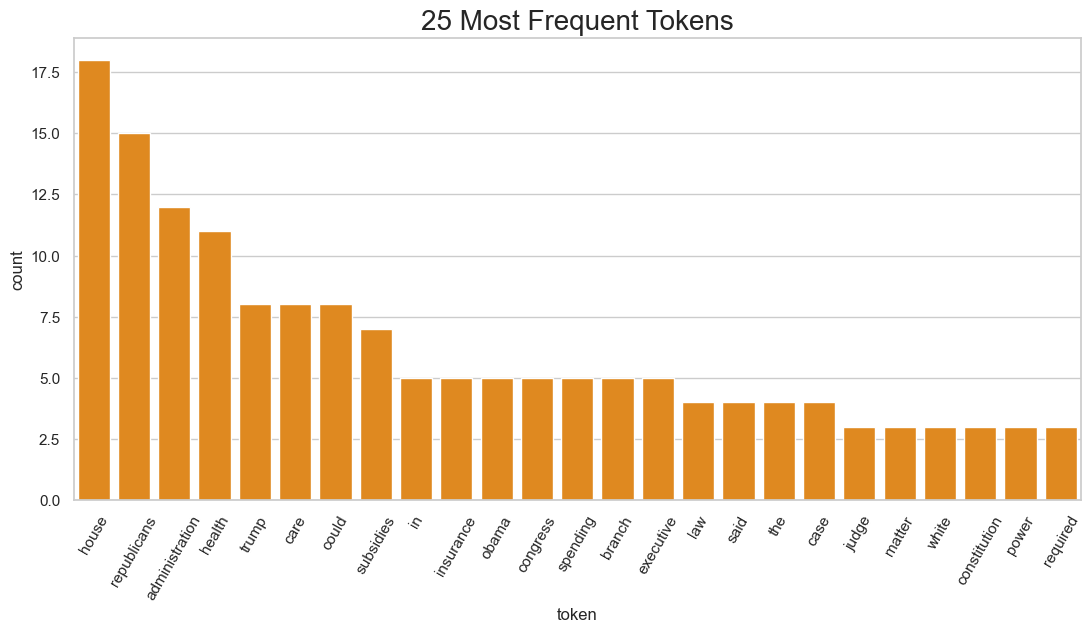

In [30]:
plot_tokens_top_25 = tokens_df.sort_values(by="count", ascending=False).head(25)

plt.figure(figsize=(13, 6))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="token", y="count", data=plot_tokens_top_25, color='darkorange')
ax.set_title("25 Most Frequent Tokens", fontsize=20)
_ = plt.xticks(rotation=60)
# plt.savefig("plots/top_tokens.png", transparent=True)

## Inverted Index

In [31]:
doc1 = 'This is natural language processing'
doc2 = 'New age of civilization language'
doc3 = 'natural way of civilization'

In [32]:
docs = [doc1, doc2, doc3]
docs

['This is natural language processing',
 'New age of civilization language',
 'natural way of civilization']

In [33]:
words = [word.lower() for doc in docs for word in doc.split()]
words

['this',
 'is',
 'natural',
 'language',
 'processing',
 'new',
 'age',
 'of',
 'civilization',
 'language',
 'natural',
 'way',
 'of',
 'civilization']

In [34]:
# Construct an inverted index
# here as a Python dictionary for ease of interpretability

inverted_index = {}

for i, doc in enumerate(docs):
    for term in doc.split():
        if term in inverted_index:
            inverted_index[term].add(i)
        else: inverted_index[term] = {i}

inverted_index

{'This': {0},
 'is': {0},
 'natural': {0, 2},
 'language': {0, 1},
 'processing': {0},
 'New': {1},
 'age': {1},
 'of': {1, 2},
 'civilization': {1, 2},
 'way': {2}}

In [35]:
posting_list = inverted_index['language']
posting_list

{0, 1}

In [36]:
def or_postings(posting1, posting2):
    p1 = 0
    p2 = 0
    result = list()
    while p1 < len(posting1) and p2 < len(posting2):
        if posting1[p1] == posting2[p2]:
            result.append(posting1[p1])
            p1 += 1
            p2 += 1
        elif posting1[p1] > posting2[p2]:
            result.append(posting2[p2])
            p2 += 1
        else:
            result.append(posting1[p1])
            p1 += 1
    while p1 < len(posting1):
        result.append(posting1[p1])
        p1 += 1
    while p2 < len(posting2):
        result.append(posting2[p2])
        p2 += 1
    return result

In [37]:
pl_1 = list(inverted_index['natural'])
pl_2 = list(inverted_index['language'])
or_postings(pl_1, pl_2) 

[0, 1, 2]

In [38]:
def and_postings(posting1, posting2):
    p1 = 0
    p2 = 0
    result = list()
    while p1 < len(posting1) and p2 < len(posting2):
        if posting1[p1] == posting2[p2]:
            result.append(posting1[p1])
            p1 += 1
            p2 += 1
        elif posting1[p1] > posting2[p2]:
            p2 += 1
        else:
            p1 += 1
    return result

In [39]:
pl_1 = list(inverted_index['natural'])
pl_2 = list(inverted_index['language'])
m = and_postings(pl_1, pl_2)

In [40]:
# print the documents
for doc_id in m:
    print(docs[i])

natural way of civilization


### Building an inverted index using NLTK

In [41]:
import nltk
from collections import defaultdict
from nltk.tokenize import sent_tokenize, word_tokenize

In [51]:
docs = df['content'].values[0:5]
def stage1(docs):
    # This will contain a list of all words in the corpus
    corpus_words = []
    # Tokenize a paragraph into sentences and each sentence in to words
    for doc in docs:
        for sent in sent_tokenize(doc):
            word_tokens = word_tokenize(sent)
            corpus_words += word_tokens
    return corpus_words


corpus_words = stage1(docs)

In [53]:
# turn them to lowecase words
lower_corpus_words = set([ x.lower() for x in corpus_words ])


In [54]:
len(lower_corpus_words) # get number of unique words

3045

In [55]:
# Remove the stopwords
from nltk.corpus import stopwords

stwords = set(stopwords.words('english'))

# Using set difference to eliminate stopwords from our words
stopfree_words = lower_corpus_words - stwords
len(stopfree_words)

2919

#### Stemming

In [56]:
from nltk.stem import snowball

stemmer = snowball.SnowballStemmer('english')
stemmed_words = set([stemmer.stem(x) for x in stopfree_words])
len(stemmed_words)

2404

In [62]:
# Lets look at some of our words
list(stemmed_words)[0:10]

['aspect',
 'two',
 'shrug',
 'third',
 'robberi',
 'astonish',
 'gruber',
 'airplan',
 'stanley',
 'blockbust']

In [58]:
# Our index is a map of word -> documents it is found in
inverted_index = defaultdict(set)

# We maintain the reference to the document by its index in the corpus list
for docid, c in enumerate(docs):
    for sent in sent_tokenize(c):
        for word in word_tokenize(sent):
            word_lower = word.lower()
            if word_lower not in stwords:
                word_stem = stemmer.stem(word_lower)
                # We add the document to the set againt the word in our
                # index
                inverted_index[word_stem].add(docid)

len(inverted_index.keys())

2404

### search using the index

In [59]:
def process_and_search(query):
    matched_documents = set()
    for word in word_tokenize(query):
        word_lower = word.lower()
        if word_lower not in stwords:
            word_stem = stemmer.stem(word_lower)
            matches = inverted_index.get(word_stem)
            if matches:
                # The operator |= is a short hand for set union
                matched_documents |= matches
    return matched_documents

In [60]:
process_and_search("Trump")

{0, 4}

In [61]:
process_and_search('natural language')

{2}